# Web Scraping

Web scraping, also known as web data extraction, is the process of retrieving or “scraping” data from a website. Unlike the mundane, mind-numbing process of manually extracting data, web scraping uses intelligent automation to retrieve hundreds, millions, or even billions of data points from the internet’s seemingly endless frontier.

Web scraping a web page involves fetching it and extracting from it. Fetching is the downloading of a page (which a browser does when you view the page). Therefore, web crawling is a main component of web scraping, to fetch pages for later processing. Once fetched, then extraction can take place. The content of a page may be parsed, searched, reformatted, its data copied into a spreadsheet, and so on. Web scrapers typically take something out of a page, to make use of it for another purpose somewhere else.

Web scraping is used for contact scraping, and as a component of applications used for web indexing, web mining and data mining, online price change monitoring and price comparison, product review scraping (to watch the competition), gathering real estate listings, weather data monitoring, website change detection, research, tracking online presence and reputation, web mashup and, web data integration.

There are methods that some websites use to prevent web scraping, such as detecting and disallowing bots from crawling (viewing) their pages. In response, there are web scraping systems that rely on using techniques in DOM parsing, computer vision and natural language processing to simulate human browsing to enable gathering web page content for offline parsing.

## Youtube content classification using Web Scraping 

In this project we extract data from official Youtube page using web scrapping idea and processed that data to build random forest model in order to classify a particular video into following 6 categories and finally we calculated the accuracy of our model using this data.

Travel,
Science,
Food,
Gaming,
Art n Dance,
History 



### Method used:

Firstly we used Selenium module and Chrome browser to scrap data from Youtube. For chrome browser automation we used chromedrive application to automate chrome which helps in navigation to work with multiple windows and frames. The scrapped data is preprocessed and stored using pandas library.Then this structured data is tokenised using nltk library.Then for this final data we have done a classification analysis using one of the well known machine learning algorithm Random Forest Classifer to test the accuracy of youtube search content.

__Code:__

In [ ]:
# Libraries
from selenium import webdriver 
import pandas as pd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

Connect to chrome using web driver to automate it and then we need to set up the driver to fetch the content of the URL from YouTube.

In [ ]:
driver = webdriver.Chrome()     #the chromedriver.exe should be in the same working directory of your code.

In [ ]:
driver.get("https://www.youtube.com/results?search_query=travel")

In [ ]:
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

The above code will fetch the “href” attribute of the anchor tag we searched for.

Now, we need to create a dataframe with 4 columns – “link”, “title”, “description”, and “category”. We will store the details of videos for different categories in these columns:

In [ ]:
df_travel = pd.DataFrame(columns = ['link', 'title', 'description', 'category'])

In [ ]:
#Scrapping the data from the loaded links.
wait = WebDriverWait(driver, 100)
v_category = "Travel"
for x in links:
    if x!=None:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_travel.loc[len(df_travel)] = [v_id, v_title, v_description, v_category]

In [ ]:
df_travel.to_csv (r'C:/Users/mssra/OneDrive/Desktop/travel.csv', index = False, header=True)
df_travel = pd.read_csv("C:/Users/mssra/OneDrive/Desktop/travel.csv")

In [ ]:
driver.get("https://www.youtube.com/results?search_query=science")

In [ ]:
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

In [ ]:
df_science = pd.DataFrame(columns = ['link', 'title', 'description', 'category'])

In [ ]:
wait = WebDriverWait(driver, 100)
v_category = "Science"
for x in links:
    if x!=None:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_science.loc[len(df_science)] = [v_id, v_title, v_description, v_category]

In [ ]:
df_science.to_csv (r'C:/Users/mssra/OneDrive/Desktop/science.csv', index = False, header=True)


In [ ]:
driver.get("https://www.youtube.com/results?search_query=food")

In [ ]:
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

In [ ]:
df_food = pd.DataFrame(columns = ['link', 'title', 'description', 'category'])

In [ ]:
wait = WebDriverWait(driver, 100)
v_category = "Food"
for x in links:
    if x!=None:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_food.loc[len(df_food)] = [v_id, v_title, v_description, v_category]

In [ ]:
df_food.to_csv (r'C:/Users/mssra/OneDrive/Desktop/food.csv', index = False, header=True)

In [ ]:
driver.get("https://www.youtube.com/results?search_query=history")

In [ ]:
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

In [ ]:
df_history = pd.DataFrame(columns = ['link', 'title', 'description', 'category'])

__Data Cleaning__:<br>
Sometimes when we extract data we may extract NULL values.It may happen because of week internet connection or due to expired link.We have to remove this type of data or add some replacement data in that place.

In [ ]:
wait = WebDriverWait(driver, 100)
v_category = "history"
for x in links:
    if x!=None:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_history.loc[len(df_history)] = [v_id, v_title, v_description, v_category]

In [ ]:
df_history.to_csv (r'C:/Users/mssra/OneDrive/Desktop/history.csv', index = False, header=True)

In [ ]:
driver.get("https://www.youtube.com/results?search_query=gaming")

In [ ]:
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

In [ ]:
df_gaming= pd.DataFrame(columns = ['link', 'title', 'description', 'category'])


In [ ]:
wait = WebDriverWait(driver, 100)
v_category = "gaming"
for x in links:
    if x!=None:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_gaming.loc[len(df_manufacturing)] = [v_id, v_title, v_description, v_category]

In [ ]:
df_gaming.to_csv (r'C:/Users/mssra/OneDrive/Desktop/gaming.csv', index = False, header=True)

In [ ]:
driver.get("https://www.youtube.com/results?search_query=artndance")

In [ ]:
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

In [ ]:
df_artndance = pd.DataFrame(columns = ['link', 'title', 'description', 'category'])

In [ ]:
wait = WebDriverWait(driver, 100)
v_category = "artndance"
for x in links[:420]:
    if x!=None:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_artndance.loc[len(df_artndance)] = [v_id, v_title, v_description, v_category]

In [ ]:
df_artndance.to_csv (r'C:/Users/mssra/OneDrive/Desktop/artndance.csv', index = False, header=True)

### Application using the extracted data

The extracted data may contain null values because all the videos may not have a title. So we added respective category name as it's title for the null values. 

In [ ]:
import numpy as np

In [ ]:
df_travel = pd.read_csv("C:/Users/mssra/Downloads/travel.xls")
df_travel['title'] = df_travel['title'].replace(np.nan,'travel')
df_travel.head()

,link,title,description,category
0,4gKHovXSO0,travel,HOW DO YOU TRAVEL WITH SPEARGUNS & DIVE GEAR!?...,Travel
1,8MzocnmCyQ,travel,Gobble Travel presents Bazaar Travels Season 1...,Travel
2,d84v3s94lvI,My Most Difficult Travel Experience in India 🥶...,"These 13 hours were the hardest, scariest, and...",Travel
3,ZAPffTImBzY,travel,Kempegowda International Airport promises to h...,Travel
4,6Mc_SgLPqTk,"Air India bonanza | Now, reschedule tickets bo...","Passengers who op to use the tickets, don't ev...",Travel


In [ ]:
df_science = pd.read_csv("C:/Users/mssra/Downloads/science.xls")
df_science['title'] = df_science['title'].replace(np.nan,'science')
df_science.head()

,link,title,description,category
0,U8X-fd_zQQ,12 Cool Science Tricks That Will Make Your Fri...,Impress your friends this weekend with these 1...,Science
1,VoLZXXQL-YY,9 Incredible Science Facts You Probably Didn't...,Common scientific facts you won't believe are ...,Science
2,z-R3DShHbkA,EASY SCIENCE EXPERIMENTS FOR KIDS,EASY SCIENCE EXPERIMENTS FOR KIDS Awesome and ...,Science
3,OY6RgrDKQ,science,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science
4,kYJt5kWNsbM,science,Learn science with these exciting and fun vide...,Science


In [ ]:
df_food = pd.read_csv("C:/Users/mssra/Downloads/food.xls")
df_food['title'] = df_food['title'].replace(np.nan,'food')
df_food.head()

,link,title,description,category
0,LHr1na5DZ44,101 Indian Street Food Dishes to Eat Before Yo...,🧳 101 Indian Street Food Dishes Kindle Book: h...,Food
1,0SPwwpruGIA,42 Foods You Need To Eat Before You Die | The ...,This is the ultimate must-try food bucket list...,Food
2,x5nEb-7UKZI,Gordon Is Blown Away By Small Indian Restauran...,This week's full episode of Ramsay's Best rest...,Food
3,5N6vDAvECU4,INSANE Indian Street Food Tour of Kuala Lumpur...,MUST TRY Indian Street Food and Malay Street F...,Food
4,UJZ79XyFg,food,"🎥STREET FOOD IN JAYAPURA, WEST PAPUA! » https:...",Food


In [ ]:
df_history = pd.read_csv("C:/Users/mssra/Downloads/history.xls")
df_history['title'] = df_history['title'].replace(np.nan,'history')
df_history.head()

,link,title,description,category
0,jmp8CoZBI,history,One Direction – History (Official Video)\nFoll...,History
1,H6d0Emmz9A4,history,Here Are Some Of The Funniest Moments In Sport...,History
2,PSnxA5HREg,history,Ancient History of India in Hindi |indian hist...,History
3,WltJPKFo_J4,history,This is the first part of The History of the W...,History
4,FeJKJ5MoCHY,10 TOP Natural History Moments | BBC Earth,"This Earth Day, stay in and explore the beauty...",History


In [ ]:
df_gaming = pd.read_csv("C:/Users/mssra/Downloads/gaming.xls")
df_gaming['title'] = df_gaming['title'].replace(np.nan,'gaming')
df_gaming.head()

In [ ]:
df_artndance = pd.read_csv("C:/Users/mssra/Downloads/artndance.xls")
df_artndance['title'] = df_artndance['title'].replace(np.nan,'artndance')
df_artndance.head()

In [ ]:
min_size = min(len(df_travel),len(df_science),len(df_food),len(df_history),len(df_gaming),len(df_artndance))

In [ ]:
min_size

413

In [ ]:
frames = [df_travel[:min_size], df_science[:min_size], df_food[:min_size], df_history[:min_size], df_gaming[:min_size], df_artndance[:min_size]]
df_copy = pd.concat(frames, axis=0, join='outer', join_axes=None, ignore_index=True,
                            keys=None, levels=None, names=None, verify_integrity=False, copy=True)

In [ ]:
len(df_copy)

2478

In [ ]:
df_link = pd.DataFrame(columns = ["link"])        
df_title = pd.DataFrame(columns = ["title"])        
df_description = pd.DataFrame(columns = ["description"])        
df_category = pd.DataFrame(columns = ["category"])        
df_link['link'] = df_copy['link'] 
df_title ['title']= df_copy['title'] 
df_description['description'] = df_copy['description'] 
df_category['category'] = df_copy['category']

__Cleaning the Scraped Data using the NLTK Library__

Import the required libraries first:

In [ ]:
import re 
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mssra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(df_title)

2478

In [ ]:
corpus = []        
for i in range(0, len(df_title)):
    if type(df_title['title'][i])==str :
      review = re.sub("[^a-zA-Z]",' ', df_title['title'][i])            
      review = review.lower()            
      review = review.split()            
      ps = PorterStemmer()            
      review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]            
      review = ' '.join(review)            
      corpus.append(review)  

In [ ]:
print(len(corpus))
corpus[:5]

2478


['travel',
 'travel',
 'difficult travel experi india donttrythi',
 'travel',
 'air india bonanza reschedul ticket book travel lockdown extra cost']

In [ ]:
len(df_description)

2478

In [ ]:
corpus1 = [] 
for i in range(0, len(df_description)):        
    if type(df_description['description'][i])==str:
      review = re.sub('[^a-zA-Z]', ' ', df_description['description'][i])            
      review = review.lower()            
      review = review.split()            
      ps = PorterStemmer()            
      review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]            
      review = ' '.join(review)            
      corpus1.append(review)

In [ ]:
corpus1[:1]

['travel speargun dive gear one question get ask time hope help next oversea spearfish dive trip bing watch b b best episod']

In [ ]:
dftitle = pd.DataFrame({'title':corpus})
dfdescription = pd.DataFrame({'description':corpus1})

The “LabelEncoder()” function encodes labels with a value between 0 and n_classes – 1 where n is the number of distinct labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder
dfcategory = df_category.apply(LabelEncoder().fit_transform)
dfcategory

Here, we have applied label encoding on df_category and stored the result into dfcategory. We can store our cleaned and encoded data in into a new dataframe:

In [ ]:
df_new = pd.concat([df_link, dftitle, dfdescription, dfcategory], axis=1, join_axes = [df_link.index])
df_new

We should create a bag-of-words so that our model can understand the keywords from that bag to classify videos accordingly. Here’s the code to do create a bag-of-words:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer   
cv = CountVectorizer(max_features = 1500) 
X = cv.fit_transform(corpus, corpus1).toarray() 
y = df_new.iloc[:, 3].values

__Building our Model to Classify YouTube Videos__<br>
Before we build our model, we need to divide the data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

__Random Forest Algorithm__

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',max_features=6)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Parameters:<br>
n_estimators: The number of trees in the forest<br>
criterion: The function to measure the quality of a split. Supported criteria are “gini” for Gini impurity and “entropy” for information gain<br>

Performance of our model on the test set:

In [ ]:
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.9899193548387096

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        80
           1       0.98      0.99      0.98        87
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        84
           4       1.00      0.97      0.98        86
           5       0.99      1.00      0.99        74

   micro avg       0.99      0.99      0.99       496
   macro avg       0.99      0.99      0.99       496
weighted avg       0.99      0.99      0.99       496



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import pandas as pd
import pprint
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing 
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[79  1  0  0  0  0]
 [ 1 86  0  0  0  0]
 [ 0  0 85  0  0  0]
 [ 0  0  0 84  0  0]
 [ 1  1  0  0 83  1]
 [ 0  0  0  0  0 74]]


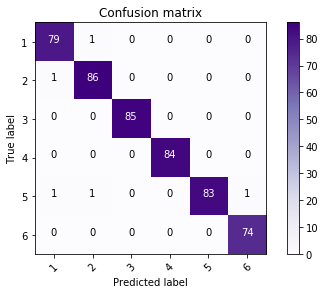

In [ ]:
plt.figure()
plot_confusion_matrix(cm, classes=['1','2','3','4','5','6'],normalize= False,  title='Confusion matrix')

__Storing the data in the local device:__<br>
The final data in the dataframe is saved as a csv file in the prescribed file directory using pandas library function .to_csv.

In [ ]:
df = pd.DataFrame(df_new, columns= ['link','title','description','category'])
df.to_csv (r'C:/Users/mssra/OneDrive/Desktop/file2.csv', index = False, header=True)

__Accuracy of the model__

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9899193548387096

__Result:__<br>
Therefore our Random Forest Classifier model accquired an accuracy of 99% by taking the scrapped data as input and the output is the category to which the video may belong to.